In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [12]:
print(X_train_norm)

[[0.47222222 0.09090909 0.52631579 0.375     ]
 [0.36111111 0.45454545 0.61403509 0.58333333]
 [0.36111111 0.22727273 0.50877193 0.41666667]
 [0.41666667 0.31818182 0.71929825 0.75      ]
 [0.33333333 0.18181818 0.49122807 0.41666667]
 [0.66666667 0.45454545 0.70175439 0.66666667]
 [0.08333333 0.72727273 0.         0.04166667]
 [0.38888889 0.36363636 0.61403509 0.5       ]
 [0.33333333 0.27272727 0.59649123 0.45833333]
 [0.38888889 0.27272727 0.43859649 0.375     ]
 [0.66666667 0.5        0.59649123 0.54166667]
 [0.55555556 0.59090909 0.64912281 0.625     ]
 [0.55555556 0.22727273 0.68421053 0.58333333]
 [0.41666667 0.31818182 0.50877193 0.45833333]
 [0.66666667 0.5        0.64912281 0.58333333]
 [0.41666667 0.31818182 0.71929825 0.75      ]
 [0.30555556 0.63636364 0.12280702 0.04166667]
 [0.16666667 0.22727273 0.61403509 0.66666667]
 [0.94444444 0.45454545 0.89473684 0.91666667]
 [0.19444444 0.68181818 0.10526316 0.20833333]
 [0.47222222 0.31818182 0.71929825 0.625     ]
 [0.58333333 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def plotNumNeighborsVsAccuracy(P_value=2, metric_value='minkowski'):
    training_accuracy = []
    test_accuracy = []
    neighbor_settings = range(1,11)
    for curKvalue in neighbor_settings:
        # build the model
        clf = KNeighborsClassifier(n_neighbors=curKvalue, p=P_value, metric=metric_value)
        clf.fit(X_train_norm, y_train)
        # Record training set accuracy
        curTrainAccuracy = clf.score(X_train_norm, y_train)
        training_accuracy.append(curTrainAccuracy)
        # Record test set accuracy
        curTestAccuracy = clf.score(X_test_norm, y_test)
        test_accuracy.append(curTestAccuracy)
    plt.plot(neighbor_settings, training_accuracy, label='Training accuracy')
    plt.plot(neighbor_settings, test_accuracy, label='Test accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('number of neighbor')
    plt.legend()

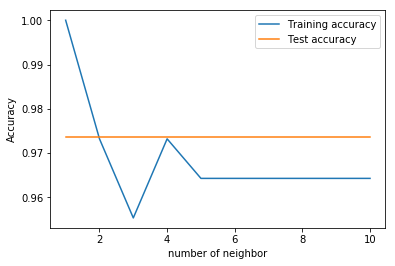

In [16]:
plotNumNeighborsVsAccuracy()

In [18]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
# Transform scale of data
ss= StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
#Train and evaluate the linear SVM
svm_clf = LinearSVC()
svm_clf.fit(X_train_scaled, y_train)
curTestAccuracy = svm_clf.score(X_test_scaled, y_test)
print(curTestAccuracy)

0.9736842105263158


In [19]:
from sklearn.svm import SVC
poly_kernal_svm_clf = SVC(kernel='poly', degree=3)
poly_kernal_svm_clf.fit(X_train_scaled, y_train)
curTestAccuracy = poly_kernal_svm_clf.score(X_test_scaled, y_test)
print(curTestAccuracy)

0.9210526315789473


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kflod = KFold(n_splits=3)
fold_accuracies = cross_val_score(svm_clf, X, y, cv=kflod)
print('Cross validation score:\n{}'.format(fold_accuracies))
print('Average cross-validation score: {:.2f}'.format(fold_accuracies.mean()))

Cross validation score:
[0. 0. 0.]
Average cross-validation score: 0.00


/Users/yizhuoli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
kflod = KFold(n_splits=3, shuffle=True, random_state=2)
fold_accuracies = cross_val_score(svm_clf, X, y, cv=kflod)
print('Cross validation score:\n{}'.format(fold_accuracies))
print('Average cross-validation score: {:.2f}'.format(fold_accuracies.mean()))

Cross validation score:
[0.94 0.98 0.94]
Average cross-validation score: 0.95


/Users/yizhuoli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yizhuoli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yizhuoli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
# True hyperparameter using cross_validation
best_score = 0
for curC in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C=curC)
    fold_accuracy = cross_val_score(svm, X_train, y_train)
    score = fold_accuracies.mean()
    if score > best_score:
        best_param = {'C': curC}
        best_score = score
svm=SVC(**best_param)
svm.fit(X_test,y_test)
#print(x_train,y_test)
test_score=svm.score(X_test,y_test)
print('best score:{:0.2f}'.format(best_score))
print('best para:{}'.format(best_param))
print('test set score:{:.2f}'.format(test_score))

best score:0.95
best para:{'C': 0.001}
test set score:0.37


/Users/yizhuoli/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/yizhuoli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yizhuoli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yizhuoli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:19